In [ ]:
# Importar librerías
from sklearn.datasets import load_diabetes
import pandas as pd

# Cargar el dataset como DataFrame
diab = load_diabetes(as_frame=True)  # Puedes usar scaled=True o False
df = pd.concat([diab.data, diab.target.rename('target')], axis=1)

# Ver las primeras filas
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
#Conocer el conjunto de datos:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

             bmi        bp    target
bmi     1.000000  0.395411  0.586450
bp      0.395411  1.000000  0.441482
target  0.586450  0.441482  1.000000


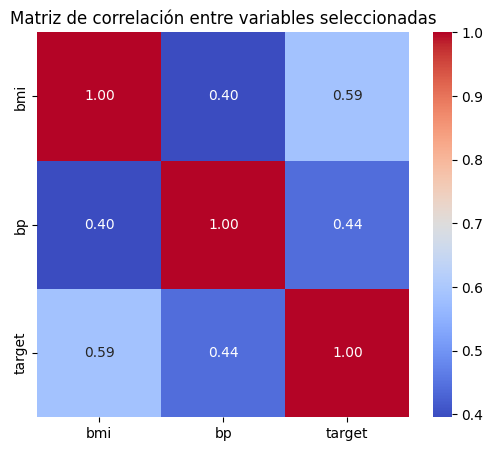

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las tres variables numéricas
variables_numericas = ['bmi', 'bp', 'target'] # Assuming you want to see the correlation between bmi, blood pressure, and the target variable. You can change these if needed.
corr_matrix = df[variables_numericas].corr()

print(corr_matrix)

# Visualizar con heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables seleccionadas')
plt.show()

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Variable dependiente y explicativa
X = df[['bp']]
y = df['target']

# Agregar constante (intercepto) para el modelo
X_const = sm.add_constant(X)
modelo = sm.OLS(y, X_const).fit()

# Mostrar resumen del modelo
print(modelo.summary())

# Predicción y residuos
df['Prediccion'] = modelo.predict(X_const) #cálculo de los valores predichos y crea una columna llamada predicción
df['Residuos'] = y - df['Prediccion'] # Calcula y guarda los residuos en una columna llamada residuos

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     106.5
Date:                Fri, 11 Jul 2025   Prob (F-statistic):           1.65e-22
Time:                        02:16:31   Log-Likelihood:                -2499.3
No. Observations:                 442   AIC:                             5003.
Df Residuals:                     440   BIC:                             5011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      3.294     46.185      0.0

In [ ]:

# Variable dependiente y explicativa
X = df[['target']]
y = df['bp']

# Agregar constante (intercepto) para el modelo
X_const = sm.add_constant(X)
modelo = sm.OLS(y, X_const).fit()

# Mostrar resumen del modelo
print(modelo.summary())

# Predicción y residuos
df['Prediccion'] = modelo.predict(X_const) #cálculo de los valores predichos y crea una columna llamada predicción
df['Residuos'] = y - df['Prediccion'] # Calcula y guarda los residuos en una columna llamada residuos

                            OLS Regression Results                            
Dep. Variable:                     bp   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     106.5
Date:                Fri, 11 Jul 2025   Prob (F-statistic):           1.65e-22
Time:                        02:17:04   Log-Likelihood:                 766.92
No. Observations:                 442   AIC:                            -1530.
Df Residuals:                     440   BIC:                            -1522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0415      0.005     -9.208      0.0